In [1]:
from yamlscript_histdata import histdata_parser
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as mpatches
from matplotlib.legend_handler import HandlerPatch
import numpy as np
import mplhep as hep
import boost_histogram as bh

In [2]:
df1, df2 = histdata_parser("CR_ttc_prefit.yaml")

histdata_parser ran in 41 ms.


In [3]:
dflist          = df1.loc[['Samples']]
hist_list       = list(reversed(df1.loc[['Samples'], 'Yield'].tolist()))
histlist_edges  = df2.loc[['BinEdges'],0][0]
histlist_labels = ['$' + x.replace('#', '\\') + '$' for x in reversed(dflist.index.get_level_values(1).tolist())]
total_yield     = df1.loc[['Total'],'Yield'][0]
data_yield      = df1.loc[['Data'],'Yield'][0]
total_errup     = df1.loc[['Total'],'Yield'][1]
total_errdown   = df1.loc[['Total'],'Yield'][2]
xaxis_label     = '$' + df2.loc[['XaxisLabel'], 0][0].replace('#', '\\') + '$'

In [15]:
class HandlerSquare(HandlerPatch):
    def create_artists(self, legend, orig_handle,
                       xdescent, ydescent, width, height, fontsize, trans):
        center = xdescent + 0.5 * (width - height), ydescent
        p = mpatches.Rectangle(xy=center, width=height,
                               height=height, angle=0.0)
        self.update_prop(p, orig_handle, legend)
        p.set_transform(trans)
        return [p]

    
from plot_classes import EmptyPlot


class PythRatio(EmptyPlot):
    
    
    def __init__(self, toptitle=None, bottitle=None, topylabel="", botylabel="", hspace=0, **kwargs):
        
        super().__init__(layout=(2,1), **kwargs)
        
        ### these should be retrived internally from filled object ---------------------
        self.dflist          = dflist
        self.histlistedges   = histlist_edges
        self.histlisttotal   = total_yield
        self.histlistdata    = data_yield
        self.histlistlabels  = histlist_labels
        self.histlisterrup   = total_errup
        self.histlisterrdown = total_errdown
        self.histlistxlabel  = xaxis_label
        # the lower part in the ratio plot is the data divided by the total hist cont
        self.ratiovalues = [i/j for i, j in zip(self.histlistdata, self.histlisttotal)]
        ### ----------------------------------------------------------------------------
        
        self.create_canvas()
        self.make_grid(hspace=hspace, height_ratios=[4,1])
        self.topax = self.make_subplot(0, 1, 0, 1)
        self.botax = self.make_subplot(1, 2, 0, 1)
        self.toptitle = toptitle
        self.bottitle = bottitle
        self.topylabel = topylabel
        self.botylabel = botylabel
        self.set_stack_color() # set default colormap
        
        # set default rcParams for the plot
        self.rc_dict = {"legend.fontsize"     : 15,
                        "legend.handletextpad": 0.15,
                        "legend.columnspacing": 0.5,
                        "legend.labelspacing" : 0.1,
                        "legend.markerscale"  : 1.2,
                        "legend.handletextpad": 0.15,
        }
        
        # update dict if user has passed any rcParam values in the constructor
        self.rc_dict.update({k: v in kwargs.items() if k in mpl.rcParams})
        
        # set parameters
        self.config_rcParams(self.rc_dict)
        
        
    def fill(self, obj):
        # put in the figure histogram object(s)
        
        if isinstance(obj, list):
            for i in range(len(obj)):
                self.container1d.append(obj[i]) # maybe theres a smarter way to do this with unpacking?
        else:
            self.container1d.append(obj)
                
        
    def top_plot(self):
        
        
        
    def bot_plot(self):
        
        
        
        
    def ratio_plot(self):
        
        
        
        
    def display(self, save_name="", dpi=800):
        
        ### overall figure ###
        self.fig.suptitle(self.title)
        
        ### top figure ###
        
        # ===== stacked histogram =====
        hep.histplot(self.container1d[0], ax=self.topax, bins=self.histlistedges, stack=True, fill=True, 
                     label=self.histlistlabels, color=self.colorlist, edgecolor='k')
        # ===== data scatter points =====
        hep.histplot(self.histlistdata, ax=self.topax, bins=self.histlistedges, histtype='errorbar', color='k', 
                     label="Data", markersize=15)
        # ===== data error histograms =====
        self.topax.stairs(self.histlisttotal, edges=self.histlistedges, color='k', alpha=0.3, hatch='///', label="Uncertainty", 
                          baseline=[self.histlisttotal[i] + self.histlisterrup[i] for i in range(len(self.histlisttotal))])
        self.topax.stairs(self.histlisttotal, edges=self.histlistedges, color='k', alpha=0.3, hatch='///',
                          baseline=[self.histlisttotal[i] + self.histlisterrdown[i] for i in range(len(self.histlisttotal))])
        
        # ===== customisations =====
        self.set_majorticks(self.topax, direction='in', length=10, bottom=True, top=True, left=True, right=True)
        self.set_minorticks(self.topax, direction='in', which='minor', length=5, bottom=True, top=True, left=True, right=True)
        self.topax.ticklabel_format(style='plain')
        self.topax.set_xticks(np.linspace(self.histlistedges[0], self.histlistedges[-1], len(self.histlistedges)))
        self.topax.set_xticklabels([])
        # self.topax.set_ylim([0, 12_000])
        self.topax.set_title(self.toptitle)
        self.topax.set_ylabel(self.topylabel)
        self.topax.legend(ncol=2, handlelength=1.7)
        # self.topax.legend([main[0]], ["ciaooo"], handler_map={main[0]: HandlerSquare()}, ncol=2, handlelength=1.7)
        hep.atlas.label(ax=self.topax, label="Internal", data=True, lumi=139)

        ### bot figure ###

        hep.histplot(self.ratiovalues, ax=self.botax, bins=self.histlistedges, histtype='errorbar', color='k', markersize=15)
        # ===== data error histograms =====
        self.histlisterrup_ratio = [(self.histlisttotal[i] + self.histlisterrup[i])/self.histlisttotal[i] for i in range(len(self.histlisttotal))]
        self.histlisterrdown_ratio = [(self.histlisttotal[i] + self.histlisterrdown[i])/self.histlisttotal[i] for i in range(len(self.histlisttotal))]
        self.botax.stairs(self.histlisterrup_ratio, edges=self.histlistedges, color='k', alpha=0.3, hatch='///', baseline=1)
        self.botax.stairs(self.histlisterrdown_ratio, edges=self.histlistedges, color='k', alpha=0.3, hatch='///', baseline=1)
        
        # ===== customisations =====
        self.set_majorticks(self.botax, direction='in', length=10, bottom=True, top=True, left=True, right=True)
        self.set_minorticks(self.botax, direction='in', which='minor', length=5, bottom=True, top=True, left=True, right=True)
        self.botax.set_ylim([0.5, 1.5])
        self.botax.axhline(1, color='k', linestyle='--')
        self.botax.set_xticks(np.linspace(self.histlistedges[0], self.histlistedges[-1], len(self.histlistedges)))
        self.botax.set_yticks([0.5, 0.75, 1, 1.25, 1.5])
        self.botax.set_yticklabels(["", "0.75", "1.00", "1.25", ""])
        self.botax.set_ylabel(self.botylabel)
        self.botax.set_xlabel(self.histlistxlabel)
        self.botax.set_title(self.bottitle)
        
        # scale ylim automatically for optimal legend placement
        hep.plot.yscale_legend(ax=self.topax)
        
        # sort legend entries
        hep.sort_legend(self.topax)
        
        if save_name:
            self.saveimage(save_name, dpi)

legend.fontsize 15
legend.handletextpad 0.15
legend.labelspacing 0.1


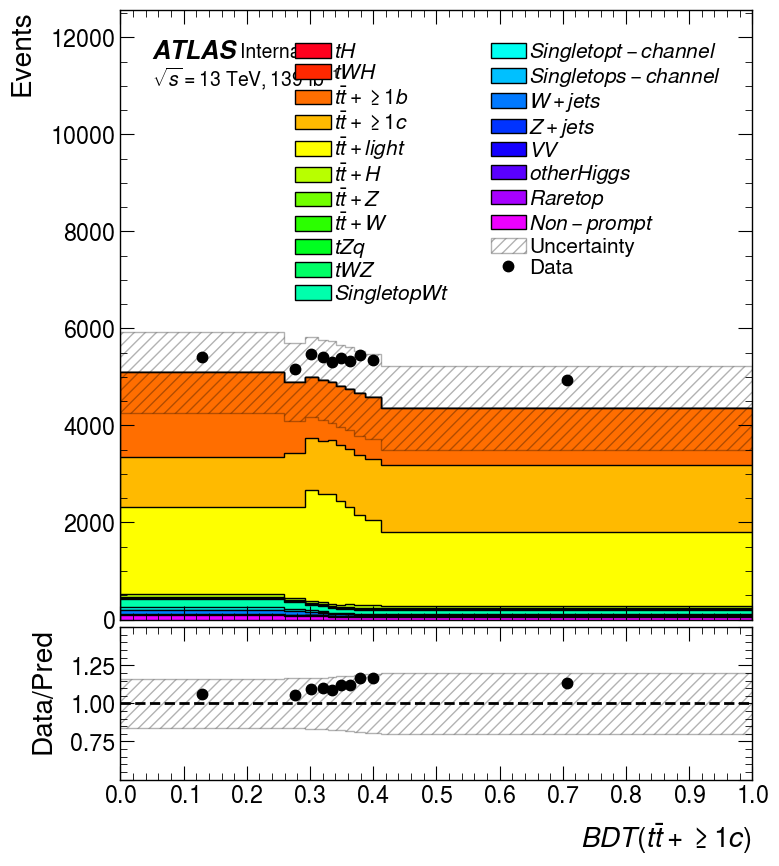

In [17]:
obj1 = PythRatio(size=(8,10), topylabel="Events", botylabel="Data/Pred", hspace=0.02)
obj1.fill(hist_list)
obj1.set_stack_color(reverse=True, colormap="gist_rainbow")
obj1.config_rcParams({"legend.labelspacing": 0.1})
obj1.display()